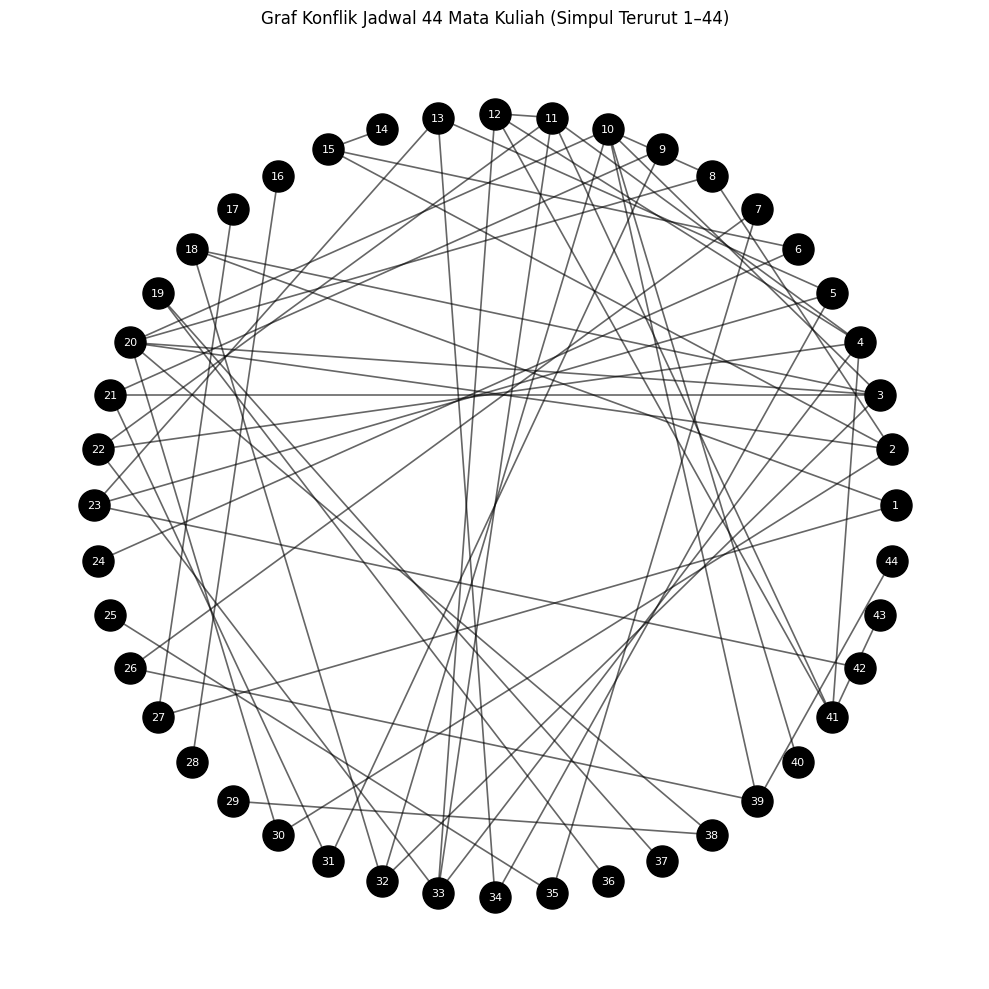

In [ ]:
# Import library
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Daftar edge tetap sama
edges = [  # ... (tetap seperti yang kamu tulis)
    (1, 18), (1, 27),
    (2, 15), (2, 30),
    (3, 20), (3, 21), (3, 32),
    (4, 11), (4, 22), (4, 33), (4, 41), (4, 12),
    (5, 23), (5, 34), (5, 13),
    (6, 24), (6, 15),
    (7, 26), (7, 35),
    (8, 10), (8, 2), (8, 20),
    (9, 31), (9, 21),
    (10, 3), (10, 32), (10, 40),
    (11, 22), (11, 33), (11, 41), (11, 12),
    (12, 4), (12, 33),
    (13, 34), (13, 23),
    (14, 15),
    (16, 28),
    (17, 27),
    (18, 3), (18, 32),
    (19, 37),
    (20, 2), (20, 30), (20, 8), (20, 10), (20, 38),
    (21, 31), (21, 9),
    (22, 33), (22, 4),
    (23, 42),
    (24, 6),
    (25, 35),
    (26, 7),
    (27, 1), (27, 17),
    (28, 16),
    (29, 38),
    (30, 2), (30, 20),
    (31, 21), (31, 9),
    (32, 3), (32, 10),
    (33, 4), (33, 11), (33, 12),
    (34, 13),
    (35, 7), (35, 25),
    (36, 19),
    (37, 19),
    (38, 20), (38, 29),
    (39, 10), (39, 26),
    (40, 10),
    (41, 11), (41, 12),
    (42, 23),
    (43, 41),
    (44, 39)
]

# Buat graf
G = nx.Graph()
G.add_edges_from(edges)

# Layout melingkar urut 1-44
def layout_simpul_urut_melingkar(graph):
    n = len(graph.nodes())
    sudut = np.linspace(0, 2*np.pi, n+1)[:-1]
    urutan = sorted(graph.nodes())
    return {node: (np.cos(a), np.sin(a)) for node, a in zip(urutan, sudut)}

pos = layout_simpul_urut_melingkar(G)

# Visualisasi
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_color='black', node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.6, width=1.2)
nx.draw_networkx_labels(G, pos, labels={n: str(n) for n in sorted(G.nodes())}, font_color='white', font_size=8)

plt.title("Graf Konflik Jadwal 44 Mata Kuliah (Simpul Terurut 1–44)", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()


✅ Pewarnaan valid: tidak ada simpul bertetangga yang memiliki warna sama.


/tmp/ipython-input-26-2320648094.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', jumlah_warna)


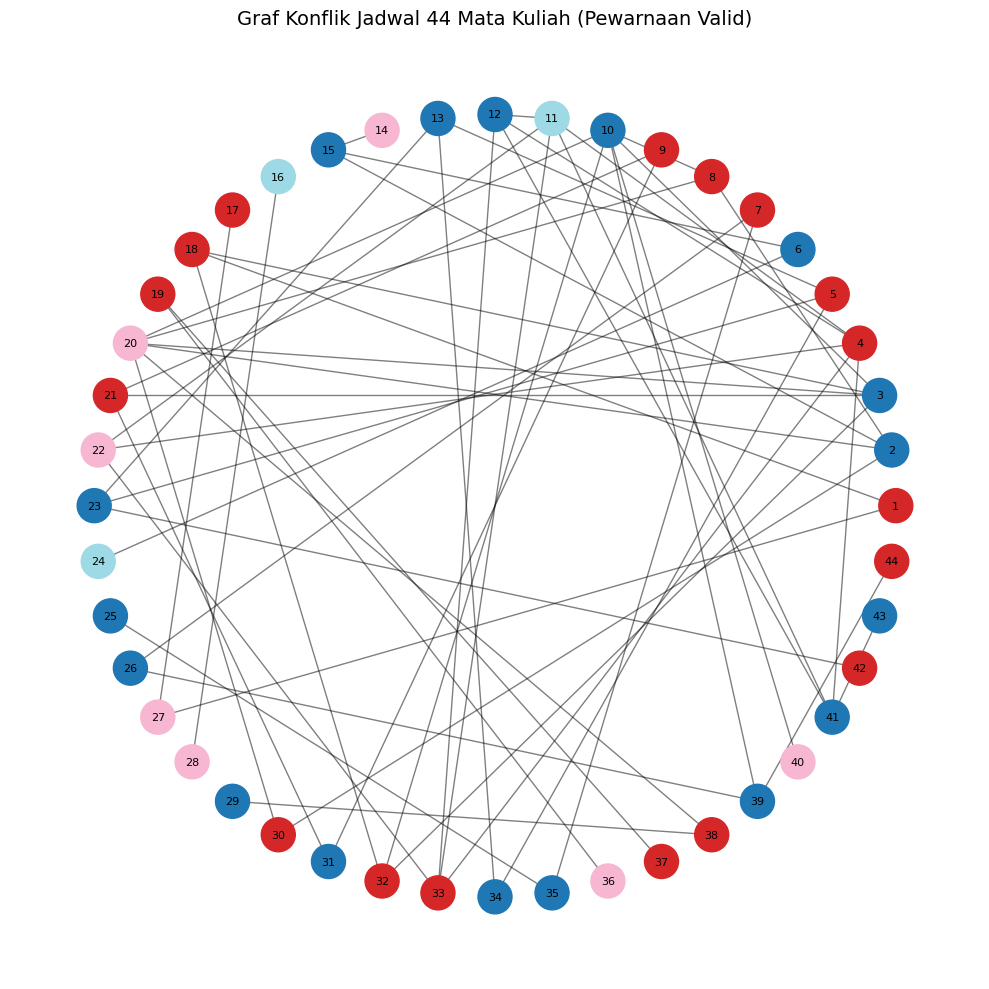


✅ Jumlah slot rapat dibutuhkan: 4

Slot ke-1: [4, 5, 7, 15, 16, 18, 19, 20, 21, 24, 25, 27, 29, 39, 40, 42, 43]
Slot ke-2: [1, 2, 6, 9, 10, 11, 14, 17, 23, 26, 28, 34, 35, 36, 37, 38, 44]
Slot ke-3: [3, 8, 13, 30, 31, 33, 41]
Slot ke-4: [12, 22, 32]


In [ ]:
# === 0. Import libraries ===
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from collections import defaultdict

# === 1. Daftar edge konflik (44 mata kuliah) ===
edges = [
    (1, 18), (1, 27), (2, 15), (2, 30), (3, 20), (3, 21), (3, 32),
    (4, 11), (4, 22), (4, 33), (4, 41), (4, 12), (5, 23), (5, 34), (5, 13),
    (6, 24), (6, 15), (7, 26), (7, 35), (8, 10), (8, 2), (8, 20), (9, 31), (9, 21),
    (10, 3), (10, 32), (10, 40), (11, 22), (11, 33), (11, 41), (11, 12),
    (12, 4), (12, 33), (13, 34), (13, 23), (14, 15), (16, 28), (17, 27),
    (18, 3), (18, 32), (19, 37), (20, 2), (20, 30), (20, 8), (20, 10), (20, 38),
    (21, 31), (21, 9), (22, 33), (22, 4), (23, 42), (24, 6), (25, 35),
    (26, 7), (27, 1), (27, 17), (28, 16), (29, 38), (30, 2), (30, 20),
    (31, 21), (31, 9), (32, 3), (32, 10), (33, 4), (33, 11), (33, 12),
    (34, 13), (35, 7), (35, 25), (36, 19), (37, 19), (38, 20), (38, 29),
    (39, 10), (39, 26), (40, 10), (41, 11), (41, 12), (42, 23), (43, 41), (44, 39)
]

# === 2. Buat graf ===
G = nx.Graph()
G.add_edges_from(edges)

# === 3. Pewarnaan Graf dengan Welsh-Powell ===
def welsh_powell_valid(graph):
    urutan = sorted(graph.nodes(), key=lambda x: graph.degree[x], reverse=True)
    warna = {}
    for simpul in urutan:
        warna_tetangga = {warna[t] for t in graph.neighbors(simpul) if t in warna}
        for w in range(len(graph.nodes())):
            if w not in warna_tetangga:
                warna[simpul] = w
                break
    return warna

warna_simpul = welsh_powell_valid(G)
jumlah_warna = max(warna_simpul.values()) + 1

# === 4. Validasi Pewarnaan (wajib) ===
konflik = False
for u, v in G.edges():
    if warna_simpul[u] == warna_simpul[v]:
        print(f"❌ Konflik warna: simpul {u} dan {v} memakai warna {warna_simpul[u]}")
        konflik = True

if not konflik:
    print("✅ Pewarnaan valid: tidak ada simpul bertetangga yang memiliki warna sama.")
else:
    print("⚠️ Masih ada konflik! Periksa fungsi pewarnaan.")

# === 5. Layout: Simpul Terurut 1–44 Melingkar ===
def layout_simpul_urut_melingkar(graf):
    n = len(graf.nodes())
    sudut = np.linspace(0, 2*np.pi, n+1)[:-1]
    urut = sorted(graf.nodes())
    return {node: (np.cos(a), np.sin(a)) for node, a in zip(urut, sudut)}

pos = layout_simpul_urut_melingkar(G)

# === 6. Visualisasi Graf ===
plt.figure(figsize=(10, 10))
colors = [warna_simpul[n] for n in sorted(G.nodes())]
cmap = cm.get_cmap('tab20', jumlah_warna)

nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=cmap, node_size=600)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={n: str(n) for n in sorted(G.nodes())}, font_size=8, font_color='black')

plt.title("Graf Konflik Jadwal 44 Mata Kuliah (Pewarnaan Valid)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# === 7. Tampilkan Slot Rapat Berdasarkan Warna ===
slot_dict = defaultdict(list)
for simpul, warna in warna_simpul.items():
    slot_dict[warna].append(simpul)

print(f"\n✅ Jumlah slot rapat dibutuhkan: {len(slot_dict)}\n")
for slot, simpul2 in sorted(slot_dict.items()):
    print(f"Slot ke-{slot + 1}: {sorted(simpul2)}")


In [ ]:
import numpy as np
import pandas as pd

# Jumlah simpul
n = 44

# Buat matriks kosong
adj_matrix = np.zeros((n, n), dtype=int)

# Isi berdasarkan edge
for u, v in G.edges():
    adj_matrix[u-1][v-1] = 1  # -1 karena simpulmu mulai dari 1, bukan 0
    adj_matrix[v-1][u-1] = 1  # simetris

# Tampilkan sebagai DataFrame biar rapi
df_matrix = pd.DataFrame(adj_matrix, columns=[f"Mk{j+1}" for j in range(n)], index=[f"Mk{i+1}" for i in range(n)])
print("Matriks Ketegangan (Konflik):")
display(df_matrix)

# Simpan ke file Excel
df_matrix.to_excel("matriks_konflik_mk.xlsx", index=True)

print("✅ Matriks konflik berhasil disimpan ke file: matriks_konflik_mk.xlsx")


Matriks Ketegangan (Konflik):


,Mk1,Mk2,Mk3,Mk4,Mk5,Mk6,Mk7,Mk8,Mk9,Mk10,...,Mk35,Mk36,Mk37,Mk38,Mk39,Mk40,Mk41,Mk42,Mk43,Mk44
Mk1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mk2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Mk3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Mk4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Mk5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mk6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mk7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Mk8,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Mk9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mk10,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


✅ Matriks konflik berhasil disimpan ke file: matriks_konflik_mk.xlsx


In [ ]:
from google.colab import files
files.download("matriks_konflik_mk.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

derajat_data = [(node, G.degree[node]) for node in sorted(G.nodes())]
df_derajat = pd.DataFrame(derajat_data, columns=["Simpul", "Derajat"])
display(df_derajat)

,Simpul,Derajat
0,1,2
1,2,4
2,3,5
3,4,5
4,5,3
5,6,2
6,7,2
7,8,3
8,9,2
9,10,6


In [ ]:
# === Fungsi Konversi Waktu ===
def ke_menit(jam_str):
    jam, menit = map(int, jam_str.split(":"))
    return jam * 60 + menit

def ke_jam(menit):
    return f"{menit // 60:02d}:{menit % 60:02d}"

# === Contoh Jadwal (bisa kamu ganti dengan data asli) ===
jadwal_per_hari = {
    "Senin": [(ke_menit("08:00"), ke_menit("10:00")), (ke_menit("13:00"), ke_menit("15:00"))],
    "Selasa": [(ke_menit("07:00"), ke_menit("08:30")), (ke_menit("10:00"), ke_menit("12:00"))],
    "Rabu": [],
    "Kamis": [(ke_menit("09:00"), ke_menit("11:00")), (ke_menit("14:00"), ke_menit("15:30"))],
    "Jumat": [(ke_menit("07:00"), ke_menit("09:00")), (ke_menit("09:30"), ke_menit("11:00")), (ke_menit("12:00"), ke_menit("15:00"))]
}

# === Batas akhir rapat: jam 18:00 ===
batas_akhir = ke_menit("18:00")
print("🕒 Slot Waktu Kosong ≥ 2 Jam (SEBELUM Jam 18:00):\n")

# === Proses Cek Slot Kosong ===
for hari, waktu in jadwal_per_hari.items():
    waktu.sort()
    mulai_hari = ke_menit("07:00")
    kosong = []

    # Cek sebelum jadwal pertama
    if waktu and waktu[0][0] - mulai_hari >= 120 and waktu[0][0] <= batas_akhir:
        kosong.append((mulai_hari, min(waktu[0][0], batas_akhir)))

    # Cek antar jadwal
    for i in range(len(waktu) - 1):
        s1, e1 = waktu[i]
        s2, e2 = waktu[i + 1]
        if s2 <= batas_akhir and s2 - e1 >= 120:
            kosong.append((e1, min(s2, batas_akhir)))

    # Cek setelah jadwal terakhir
    if waktu and waktu[-1][1] < batas_akhir and batas_akhir - waktu[-1][1] >= 120:
        kosong.append((waktu[-1][1], batas_akhir))
    elif not waktu and batas_akhir - mulai_hari >= 120:
        kosong.append((mulai_hari, batas_akhir))

    # Output
    print(f"{hari}:")
    if kosong:
        for start, end in kosong:
            print(f"- {ke_jam(start)} – {ke_jam(end)}")
    else:
        print("- Tidak ada slot kosong ≥ 2 jam sebelum 18:00")


🕒 Slot Waktu Kosong ≥ 2 Jam (SEBELUM Jam 18:00):

Senin:
- 10:00 – 13:00
- 15:00 – 18:00
Selasa:
- 12:00 – 18:00
Rabu:
- 07:00 – 18:00
Kamis:
- 07:00 – 09:00
- 11:00 – 14:00
- 15:30 – 18:00
Jumat:
- 15:00 – 18:00
